In [2]:
#Import libraries 
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) #Adjust config of plots later

#read in data 
import pandas as pd
df = pd.read_csv('movies.csv',  encoding ='latin1')

In [3]:
df.head()

budget                                 company country        director  \
0   8000000.0           Columbia Pictures Corporation     USA      Rob Reiner   
1   6000000.0                      Paramount Pictures     USA     John Hughes   
2  15000000.0                      Paramount Pictures     USA      Tony Scott   
3  18500000.0  Twentieth Century Fox Film Corporation     USA   James Cameron   
4   9000000.0                    Walt Disney Pictures     USA  Randal Kleiser   

       genre        gross                      name rating    released  \
0  Adventure   52287414.0               Stand by Me      R  1986-08-22   
1     Comedy   70136369.0  Ferris Bueller's Day Off  PG-13  1986-06-11   
2     Action  179800601.0                   Top Gun     PG  1986-05-16   
3     Action   85160248.0                    Aliens      R  1986-07-18   
4  Adventure   18564613.0   Flight of the Navigator     PG  1986-08-01   

   runtime  score               star   votes         writer  year  
0       89    8.1        Wil Wheaton  299174   Stephen King  1986  
1      103    7.8  Matthew Broderick  264740    John Hughes  1986  
2      110    6.9         Tom Cruise  236909       Jim Cash  1986  
3      137    8.4   Sigourney Weaver  540152  James Cameron  1986  
4       90    6.9        Joey Cramer   36636  Mark H. Baker  1986

In [14]:
# Check for missing data 

for col in df.columns:
    percent_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, percent_missing))

budget - 0.0%
company - 0.0%
country - 0.0%
director - 0.0%
genre - 0.0%
gross - 0.0%
name - 0.0%
rating - 0.0%
released - 0.0%
runtime - 0.0%
score - 0.0%
star - 0.0%
votes - 0.0%
writer - 0.0%
year - 0.0%


In [15]:
#Data type of columns 
df.dtypes

budget      float64
company      object
country      object
director     object
genre        object
gross       float64
name         object
rating       object
released     object
runtime       int64
score       float64
star         object
votes         int64
writer       object
year          int64
dtype: object

In [4]:
#remove unnecessary decimals, by changing data types 

df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')




In [17]:
df.head()

budget                                 company country        director  \
0   8000000           Columbia Pictures Corporation     USA      Rob Reiner   
1   6000000                      Paramount Pictures     USA     John Hughes   
2  15000000                      Paramount Pictures     USA      Tony Scott   
3  18500000  Twentieth Century Fox Film Corporation     USA   James Cameron   
4   9000000                    Walt Disney Pictures     USA  Randal Kleiser   

       genre      gross                      name rating    released  runtime  \
0  Adventure   52287414               Stand by Me      R  1986-08-22       89   
1     Comedy   70136369  Ferris Bueller's Day Off  PG-13  1986-06-11      103   
2     Action  179800601                   Top Gun     PG  1986-05-16      110   
3     Action   85160248                    Aliens      R  1986-07-18      137   
4  Adventure   18564613   Flight of the Navigator     PG  1986-08-01       90   

   score               star   votes         writer  year  
0    8.1        Wil Wheaton  299174   Stephen King  1986  
1    7.8  Matthew Broderick  264740    John Hughes  1986  
2    6.9         Tom Cruise  236909       Jim Cash  1986  
3    8.4   Sigourney Weaver  540152  James Cameron  1986  
4    6.9        Joey Cramer   36636  Mark H. Baker  1986

In [40]:
#Create correct year column for updated year to make sure year and released dates match 

df['correctyear']=df['released'].astype(str).str[:4]
df.head()

budget  company  country  director  genre      gross  name  rating  \
0   8000000      665       54      2192      1   52287414  4661       8   
1   6000000     1680       54      1296      4   70136369  1821       7   
2  15000000     1680       54      2645      0  179800601  6203       6   
3  18500000     2062       54      1066      0   85160248   295       8   
4   9000000     2122       54      2123      1   18564613  1872       6   

   released  runtime  score  star   votes  writer  year correctyear  
0        39       89    8.1  2454  299174    3716  1986          39  
1        27      103    7.8  1605  264740    1970  1986          27  
2        23      110    6.9  2345  236909    1852  1986          23  
3        33      137    8.4  2192  540152    1629  1986          33  
4        36       90    6.9  1139   36636    2549  1986          36

In [6]:
df.sort_values(by = ['gross'], inplace = False, ascending = False)

budget                                 company country  \
6380  245000000                               Lucasfilm     USA   
5061  237000000  Twentieth Century Fox Film Corporation      UK   
2420  200000000  Twentieth Century Fox Film Corporation     USA   
6391  150000000                      Universal Pictures     USA   
5723  220000000                          Marvel Studios     USA   
...         ...                                     ...     ...   
5917          0           Zentropa International Norway  Norway   
5699          0                        Isle of Man Film      UK   
6066          0                           Cinetel Films     USA   
2594   15000000                                Daybreak     USA   
6784          0                           Magic Lantern   Spain   

              director   genre      gross                          name  \
6380       J.J. Abrams  Action  936662225  Star Wars: The Force Awakens   
5061     James Cameron  Action  760507625                        Avatar   
2420     James Cameron   Drama  658672302                       Titanic   
6391   Colin Trevorrow  Action  652270625                Jurassic World   
5723       Joss Whedon  Action  623357910                  The Avengers   
...                ...     ...        ...                           ...   
5917       Petter Næss  Action        547                Into the White   
5699    Sheree Folkson  Comedy        542               The Decoy Bride   
6066  Steven R. Monroe   Crime        441        I Spit on Your Grave 2   
2594      George Huang  Comedy        309                    Trojan War   
6784    Carles Torrens  Horror         70                           Pet   

     rating    released  runtime  score               star    votes  \
6380  PG-13  2015-12-18      136    8.1       Daisy Ridley   687192   
5061  PG-13  2009-12-18      162    7.8    Sam Worthington   954412   
2420  PG-13  1997-12-19      194    7.8  Leonardo DiCaprio   862554   
6391  PG-13  2015-06-12      124    7.0        Chris Pratt   469200   
5723  PG-13  2012-05-04      143    8.1  Robert Downey Jr.  1064633   
...     ...         ...      ...    ...                ...      ...   
5917      R  2013-04-12      104    7.2      Florian Lukas    16609   
5699     PG  2012-03-09       89    6.2    Kelly Macdonald     9018   
6066      R  2014-01-19      106    5.7    Jemma Dallender    21070   
2594  PG-13  1997-10-01       84    5.7       Will Friedle     5034   
6784      R  2016-12-02       94    5.7   Dominic Monaghan    10504   

               writer  year correctyear  
6380  Lawrence Kasdan  2015        2015  
5061    James Cameron  2009        2009  
2420    James Cameron  1997        1997  
6391       Rick Jaffa  2015        2015  
5723      Joss Whedon  2012        2012  
...               ...   ...         ...  
5917    Ole Meldgaard  2012        2013  
5699    Neil Jaworski  2011        2012  
6066       Neil Elman  2013        2014  
2594        Andy Burg  1997        1997  
6784    Jeremy Slater  2016        2016  

[6820 rows x 16 columns]

In [7]:
pd.set_option('display.max_rows', None )

In [41]:
#Drop duplicated values 


#Shows distinct values 
drop_duplicate_values = df['company'].drop_duplicates().sort_values(ascending = False)
drop_duplicate_values.head()

#df.drop_duplicates()

5288    2178
3486    2177
6084    2176
3225    2175
2707    2174
Name: company, dtype: int16

In [39]:
df.head()

budget  company  country  director  genre      gross  name  rating  \
0   8000000      665       54      2192      1   52287414  4661       8   
1   6000000     1680       54      1296      4   70136369  1821       7   
2  15000000     1680       54      2645      0  179800601  6203       6   
3  18500000     2062       54      1066      0   85160248   295       8   
4   9000000     2122       54      2123      1   18564613  1872       6   

   released  runtime  score  star   votes  writer  year  correctyear  
0        39       89    8.1  2454  299174    3716  1986            0  
1        27      103    7.8  1605  264740    1970  1986            0  
2        23      110    6.9  2345  236909    1852  1986            0  
3        33      137    8.4  2192  540152    1629  1986            0  
4        36       90    6.9  1139   36636    2549  1986            0

In [10]:
#Hypothesis:
# Budget will have high correlation with high gross value 
# Company will have high correlation with high gross value 

<function matplotlib.pyplot.show(close=None, block=None)>

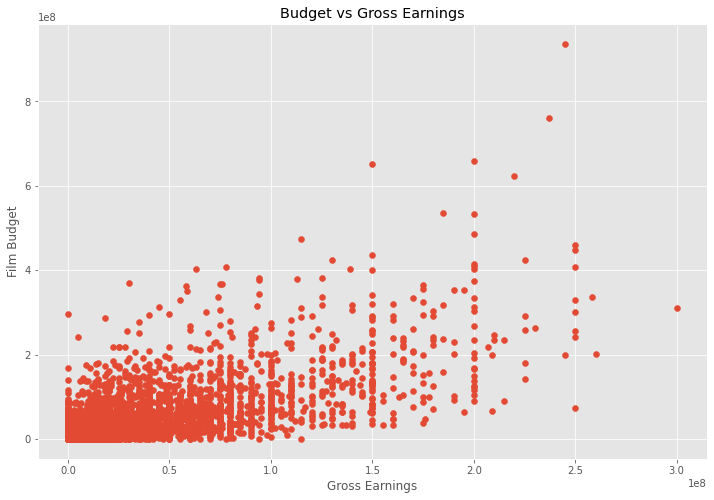

In [13]:
#Build a scatter plot to compare budget and gross revenue 

plt.scatter(x=df['budget'], y=df['gross'])

plt.title ('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Film Budget')

plt.show

In [12]:
df.head()

budget                                 company country        director  \
0   8000000           Columbia Pictures Corporation     USA      Rob Reiner   
1   6000000                      Paramount Pictures     USA     John Hughes   
2  15000000                      Paramount Pictures     USA      Tony Scott   
3  18500000  Twentieth Century Fox Film Corporation     USA   James Cameron   
4   9000000                    Walt Disney Pictures     USA  Randal Kleiser   

       genre      gross                      name rating    released  runtime  \
0  Adventure   52287414               Stand by Me      R  1986-08-22       89   
1     Comedy   70136369  Ferris Bueller's Day Off  PG-13  1986-06-11      103   
2     Action  179800601                   Top Gun     PG  1986-05-16      110   
3     Action   85160248                    Aliens      R  1986-07-18      137   
4  Adventure   18564613   Flight of the Navigator     PG  1986-08-01       90   

   score               star   votes         writer  year correctyear  
0    8.1        Wil Wheaton  299174   Stephen King  1986        1986  
1    7.8  Matthew Broderick  264740    John Hughes  1986        1986  
2    6.9         Tom Cruise  236909       Jim Cash  1986        1986  
3    8.4   Sigourney Weaver  540152  James Cameron  1986        1986  
4    6.9        Joey Cramer   36636  Mark H. Baker  1986        1986

<AxesSubplot:xlabel='budget', ylabel='gross'>

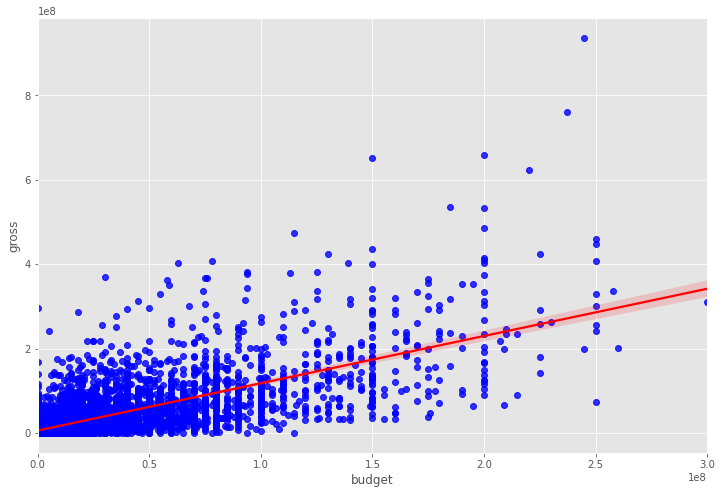

In [15]:
#Plot budget vs gross using seaborn 

sns.regplot(x='budget', y='gross', data = df, scatter_kws = {"color": "blue"}, line_kws = {"color":"red"})

In [16]:
#Correlation investigation 

In [18]:
df.corr(method = 'pearson') #highest correlation is between budget and gross: 0.712

budget     gross   runtime     score     votes      year
budget   1.000000  0.712196  0.268226  0.042145  0.503924  0.291009
gross    0.712196  1.000000  0.224579  0.165693  0.662457  0.191548
runtime  0.268226  0.224579  1.000000  0.395343  0.317399  0.087639
score    0.042145  0.165693  0.395343  1.000000  0.393607  0.105276
votes    0.503924  0.662457  0.317399  0.393607  1.000000  0.229304
year     0.291009  0.191548  0.087639  0.105276  0.229304  1.000000

In [19]:
df.corr(method = 'kendall') #highest correlation is between budget and gross: 0.523

budget     gross   runtime     score     votes      year
budget   1.000000  0.523459  0.164816 -0.019526  0.451137  0.214114
gross    0.523459  1.000000  0.139270  0.033163  0.479772  0.098585
runtime  0.164816  0.139270  1.000000  0.282068  0.195640  0.073785
score   -0.019526  0.033163  0.282068  1.000000  0.272967  0.070451
votes    0.451137  0.479772  0.195640  0.272967  1.000000  0.339625
year     0.214114  0.098585  0.073785  0.070451  0.339625  1.000000

In [20]:
df.corr(method = 'spearman') #highest correlation is between budget and gross: 0.698

budget     gross   runtime     score     votes      year
budget   1.000000  0.698639  0.231672 -0.027868  0.616419  0.300553
gross    0.698639  1.000000  0.202905  0.045582  0.667869  0.139467
runtime  0.231672  0.202905  1.000000  0.398840  0.287150  0.107902
score   -0.027868  0.045582  0.398840  1.000000  0.392199  0.103598
votes    0.616419  0.667869  0.287150  0.392199  1.000000  0.485588
year     0.300553  0.139467  0.107902  0.103598  0.485588  1.000000

In [21]:
#High correlaion between budget and gross is seen 

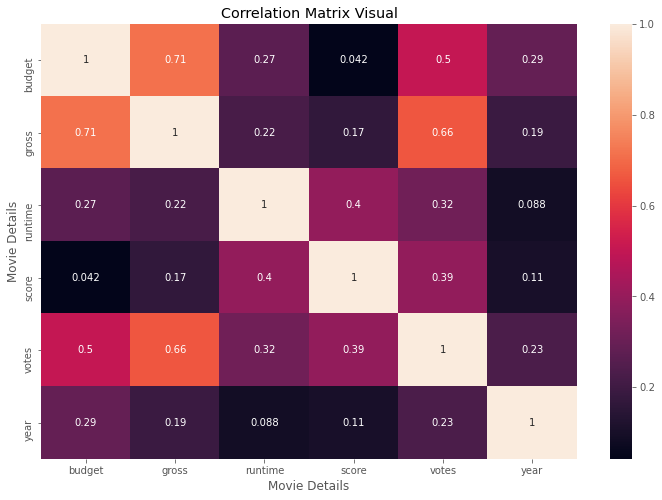

In [25]:
correlation_matrix = df.corr(method = 'pearson') 

sns.heatmap(correlation_matrix, annot = True)


plt.title ('Correlation Matrix Visual')
plt.xlabel('Movie Details')
plt.ylabel('Movie Details')


plt.show()

In [26]:
#Company Correlation investigation 
#Problem: Company values are string, making it difficult to look at correlations 

In [31]:
df_number = df

for col_name in df_number.columns:
    if (df_number[col_name].dtype == 'object'):
        df_number[col_name]= df_number[col_name].astype('category')
        df_number[col_name] = df_number[col_name].cat.codes
        
df_number

budget  company  country  director  genre      gross  name  rating  \
0       8000000      665       54      2192      1   52287414  4661       8   
1       6000000     1680       54      1296      4   70136369  1821       7   
2      15000000     1680       54      2645      0  179800601  6203       6   
3      18500000     2062       54      1066      0   85160248   295       8   
4       9000000     2122       54      2123      1   18564613  1872       6   
5       6000000     1158       53      1948      6  138530565  3903       8   
6      25000000     1160       53      1207      1   12729917  2883       6   
7       6000000      768       54       588      6    8551228   771       8   
8       9000000     1680       54      1004      4   40471663  3964       7   
9      15000000     1854       54       557      6   40456565  5306       8   
10      8800000     1827        2      2033      1  174635000  1238       7   
11     16000000     2024       53      2292      0    5900000  2306       8   
12      6000000     2062       54       612      4    8200000  3110       7   
13     25000000     2062       54      1267      0   11100000   686       7   
14     15000000      768       54      1792      5    8620929  3196       8   
15     17000000     1752       54        28      6    6734844    93       8   
16     10000000      768       54      2447      0    7433663  3248       8   
17     25000000     1052       54       811      4   38747385  3022       7   
18      2700000     1579       54      1845      0    3500000  6093       7   
19     35000000     2085       54      2699      0   16295774  2413       6   
20      2000000     1582       54      2441      0   13167232  1236       7   
21     11000000     1646       54        50      4   91258000   523       7   
22      4700000      508       54      2582      4    8025872  5978      12   
23     15000000     1280       54       459      0   42724017  2242       8   
24     25000000     1680       54      1562      1  109713132  4668       6   
25            0     2050       54      1258      4   40697761  4451       6   
26            0     1575       27      1138      5    7153487  5696       8   
27            0     2050       54      2391      0   24159872  2590       7   
28     25000000     1680       54      1805      0   79817937  5350       7   
29      1900000     1158       54      2570      5    4600000  4177       8   
30     25000000     1343       54      1303      4   39246734  6728       6   
31     25000000     2123       54       889      0   49042224  1122       8   
32            0     1049       16      1139      6    2003822   654       5   
33     24500000     2123       53      2264      1   17218023  5672       6   
34     13800000     2041       54      1702      6   52293982  5137       8   
35            0      665       54      1283      0  115103979  5511       6   
36            0     1424       54      1906      6    7177431  5078       6   
37      6000000     1124       54      2214     14    5844868  5416       8   
38     10000000      142       54      2145      4   37499651  5676       6   
39      3000000     1680       54      2612      9   19472057  2640       8   
40     25000000     2016       54      2068      1   14302779  5683       6   
41            0     2085       54       671      2   47483002   371       2   
42      4000000     1244       53        71      3    2826523  4473       8   
43     10000000      768       54      1287      0    4711220  2790       7   
44      4500000      866       54      2498      9    1261000  1964       8   
45     18000000     2050       54       794      4   41382841  3844       7   
46     19000000     1018       54       297      9   40996665  3929       7   
47      1100000      866       54      1265      4    5450815  6258       7   
48            0     1515       54      2043      0   38500726  4252       8   
49            0     1151       54      1805      4   262855

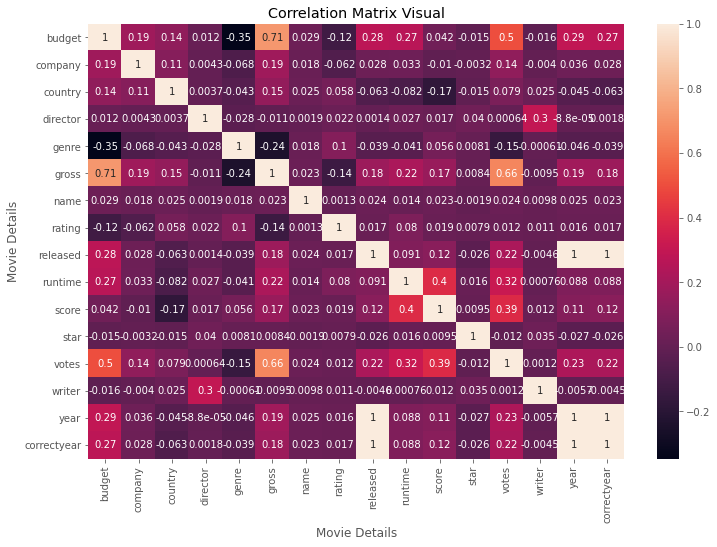

In [32]:
correlation_matrix = df_number.corr(method = 'pearson') 

sns.heatmap(correlation_matrix, annot = True)


plt.title ('Correlation Matrix Visual')
plt.xlabel('Movie Details')
plt.ylabel('Movie Details')


plt.show()

In [33]:
#Company in reality has a low correlation with gross revenue, only 0.19 proving 
#this part of hypothesis being somewhat incorrect

In [34]:
df_number.corr()

budget   company   country  director     genre     gross  \
budget       1.000000  0.187205  0.137635  0.011602 -0.346794  0.712196   
company      0.187205  1.000000  0.107950  0.004320 -0.068330  0.187220   
country      0.137635  0.107950  1.000000  0.003698 -0.042793  0.149988   
director     0.011602  0.004320  0.003698  1.000000 -0.027668 -0.011429   
genre       -0.346794 -0.068330 -0.042793 -0.027668  1.000000 -0.242676   
gross        0.712196  0.187220  0.149988 -0.011429 -0.242676  1.000000   
name         0.028712  0.018098  0.025020  0.001905  0.018062  0.022768   
rating      -0.119660 -0.062250  0.057979  0.021926  0.100960 -0.135538   
released     0.276635  0.027898 -0.062609  0.001440 -0.039179  0.178564   
runtime      0.268226  0.033058 -0.081796  0.026779 -0.041357  0.224579   
score        0.042145 -0.010426 -0.174414  0.017130  0.056234  0.165693   
star        -0.015061 -0.003160 -0.014566  0.039813  0.008140  0.008382   
votes        0.503924  0.138662  0.078657  0.000639 -0.150519  0.662457   
writer      -0.015611 -0.004032  0.024981  0.298997 -0.000608 -0.009455   
year         0.291009  0.036272 -0.045204 -0.000088 -0.046259  0.191548   
correctyear  0.274820  0.028012 -0.062707  0.001822 -0.039014  0.176879   

                 name    rating  released   runtime     score      star  \
budget       0.028712 -0.119660  0.276635  0.268226  0.042145 -0.015061   
company      0.018098 -0.062250  0.027898  0.033058 -0.010426 -0.003160   
country      0.025020  0.057979 -0.062609 -0.081796 -0.174414 -0.014566   
director     0.001905  0.021926  0.001440  0.026779  0.017130  0.039813   
genre        0.018062  0.100960 -0.039179 -0.041357  0.056234  0.008140   
gross        0.022768 -0.135538  0.178564  0.224579  0.165693  0.008382   
name         1.000000  0.001288  0.024120  0.013942  0.023342 -0.001910   
rating       0.001288  1.000000  0.016696  0.079542  0.019271  0.007893   
released     0.024120  0.016696  1.000000  0.091102  0.119577 -0.025504   
runtime      0.013942  0.079542  0.091102  1.000000  0.395343  0.016019   
score        0.023342  0.019271  0.119577  0.395343  1.000000  0.009482   
star        -0.001910  0.007893 -0.025504  0.016019  0.009482  1.000000   
votes        0.023665  0.011678  0.221736  0.317399  0.393607 -0.011919   
writer       0.009821  0.010740 -0.004635  0.000759  0.012223  0.035378   
year         0.024624  0.016221  0.996187  0.087639  0.105276 -0.026680   
correctyear  0.023411  0.017438  0.999389  0.088342  0.117679 -0.026050   

                votes    writer      year  correctyear  
budget       0.503924 -0.015611  0.291009     0.274820  
company      0.138662 -0.004032  0.036272     0.028012  
country      0.078657  0.024981 -0.045204    -0.062707  
director     0.000639  0.298997 -0.000088     0.001822  
genre       -0.150519 -0.000608 -0.046259    -0.039014  
gross        0.662457 -0.009455  0.191548     0.176879  
name         0.023665  0.009821  0.024624     0.023411  
rating       0.011678  0.010740  0.016221     0.017438  
released     0.221736 -0.004635  0.996187     0.999389  
runtime      0.317399  0.000759  0.087639     0.088342  
score        0.393607  0.012223  0.105276     0.117679  
star        -0.011919  0.035378 -0.026680    -0.026050  
votes        1.000000  0.001154  0.229304     0.220797  
writer       0.001154  1.000000 -0.005665    -0.004546  
year         0.229304 -0.005665  1.000000     0.996229  
correctyear  0.220797 -0.004546  0.996229     1.000000

In [36]:
#What other fields have high correlation 

correlation_mat = df_number.corr()
corr_pairs = correlation_mat.unstack()
corr_pairs

budget       budget         1.000000
             company        0.187205
             country        0.137635
             director       0.011602
             genre         -0.346794
             gross          0.712196
             name           0.028712
             rating        -0.119660
             released       0.276635
             runtime        0.268226
             score          0.042145
             star          -0.015061
             votes          0.503924
             writer        -0.015611
             year           0.291009
             correctyear    0.274820
company      budget         0.187205
             company        1.000000
             country        0.107950
             director       0.004320
             genre         -0.068330
             gross          0.187220
             name           0.018098
             rating        -0.062250
             released       0.027898
             runtime        0.033058
             score         -0.010426
 

In [37]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

genre        budget        -0.346794
budget       genre         -0.346794
gross        genre         -0.242676
genre        gross         -0.242676
score        country       -0.174414
country      score         -0.174414
votes        genre         -0.150519
genre        votes         -0.150519
rating       gross         -0.135538
gross        rating        -0.135538
budget       rating        -0.119660
rating       budget        -0.119660
country      runtime       -0.081796
runtime      country       -0.081796
genre        company       -0.068330
company      genre         -0.068330
country      correctyear   -0.062707
correctyear  country       -0.062707
country      released      -0.062609
released     country       -0.062609
rating       company       -0.062250
company      rating        -0.062250
year         genre         -0.046259
genre        year          -0.046259
country      year          -0.045204
year         country       -0.045204
genre        country       -0.042793
c

In [38]:
high_corr = sorted_pairs[(sorted_pairs)>0.5]
high_corr #ignoring paris with 1.00

votes        budget         0.503924
budget       votes          0.503924
votes        gross          0.662457
gross        votes          0.662457
             budget         0.712196
budget       gross          0.712196
released     year           0.996187
year         released       0.996187
correctyear  year           0.996229
year         correctyear    0.996229
correctyear  released       0.999389
released     correctyear    0.999389
budget       budget         1.000000
writer       writer         1.000000
votes        votes          1.000000
star         star           1.000000
score        score          1.000000
runtime      runtime        1.000000
released     released       1.000000
rating       rating         1.000000
name         name           1.000000
gross        gross          1.000000
genre        genre          1.000000
director     director       1.000000
country      country        1.000000
company      company        1.000000
year         year           1.000000
c

In [ ]:
#Votes and budget have the highest correlation to gross earnings
#Company has low correlation 